<a href="https://colab.research.google.com/github/roapple10/Python-learning-note/blob/main/IBN_HR_analysis_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# sns.color_palette("Set3", as_cmap=True)
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
pd.options.display.max_columns = 200
pd.options.display.max_rows =200

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
df[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df[categorical_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
missing_counts = df[numeric_cols].isna().sum().sort_values(ascending = False)
missing_counts[missing_counts>0]

Series([], dtype: int64)

In [ ]:
missing_counts = df[categorical_cols].isna().sum().sort_values(ascending = False)
missing_counts[missing_counts>0]

Series([], dtype: int64)

In [ ]:
df[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

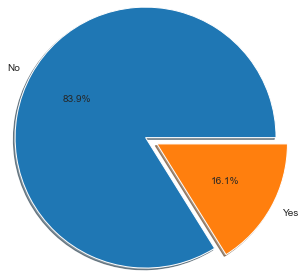

In [ ]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r,explode=(0.05,0.1),labels=['No','Yes'],radius=1.5, autopct ='%1.1f%%',shadow=True )
plt.show()

In [ ]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [ ]:
# Reassign target
df['Attrition'] = df['Attrition'].map({"No":0,"Yes":1})


In [ ]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
# Drop useless feat
df = df.drop(columns=['StandardHours','EmployeeCount','Over18'])

### Data Visualization

C:\Users\gl3055109\Anaconda3_1\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

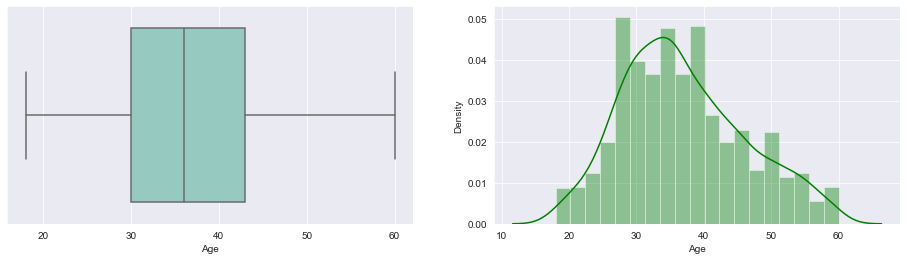

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3",x=df['Age'])
sns.distplot(ax=axes[1],color="Green",a=df['Age'])

C:\Users\gl3055109\Anaconda3_1\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

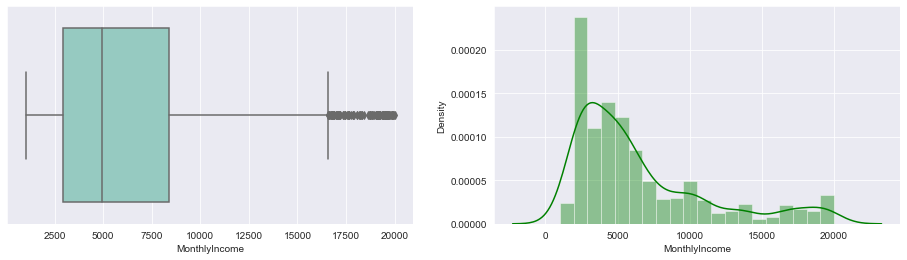

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3",x=df['MonthlyIncome'])
sns.distplot(ax=axes[1],color="Green",a=df['MonthlyIncome'])

In [ ]:
len(df[df['MonthlyIncome']>17500])

81

C:\Users\gl3055109\Anaconda3_1\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

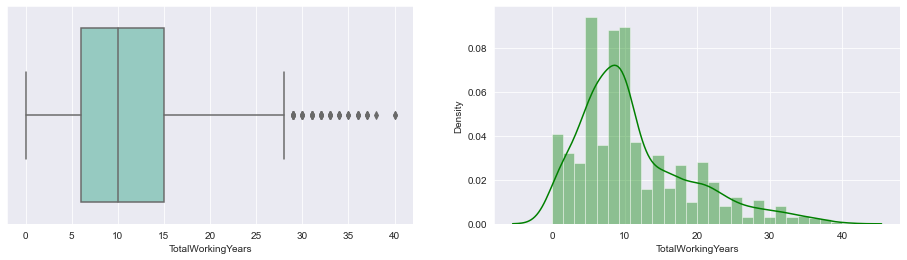

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3", x=df['TotalWorkingYears'])
sns.distplot(ax=axes[1],color="Green", a=df["TotalWorkingYears"])

In [ ]:
len(df[df['TotalWorkingYears']>28])

63

C:\Users\gl3055109\Anaconda3_1\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

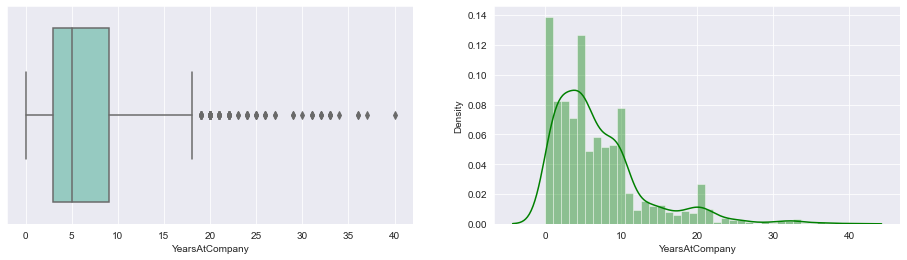

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3", x=df['YearsAtCompany'])
sns.distplot(ax=axes[1],color="Green", a=df["YearsAtCompany"])

In [ ]:
len(df[df['YearsAtCompany']>18])

104

C:\Users\gl3055109\Anaconda3_1\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

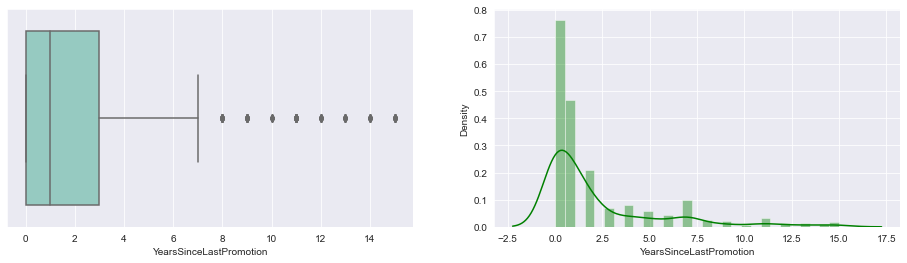

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(ax=axes[0],palette="Set3", x=df['YearsSinceLastPromotion'])
sns.distplot(ax=axes[1],color="Green", a=df["YearsSinceLastPromotion"])

In [ ]:
len(df[df['YearsSinceLastPromotion']>7])

107

In [ ]:
len(df)

1470

In [ ]:
df = df[df['YearsSinceLastPromotion']<7]

In [ ]:
len(df)

1287

<AxesSubplot:>

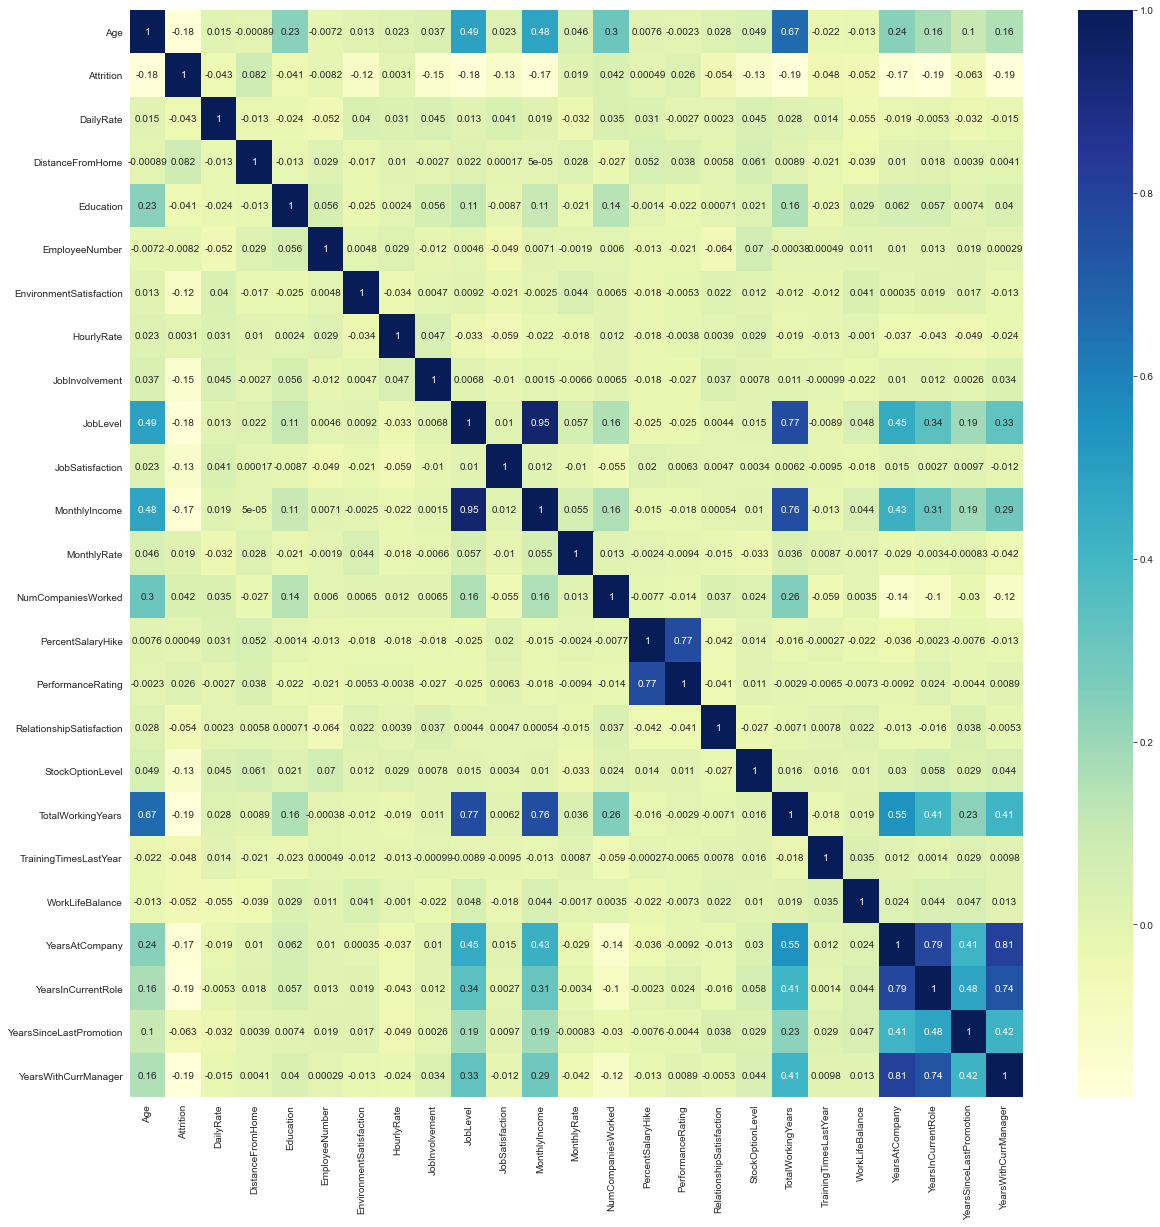

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

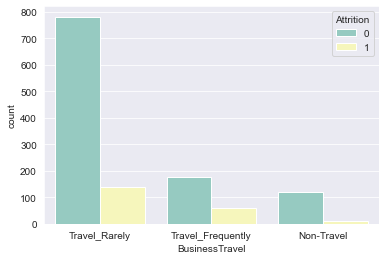

In [ ]:
sns.countplot(x='BusinessTravel',palette = 'Set3', hue='Attrition', data = df)

<AxesSubplot:xlabel='Department', ylabel='count'>

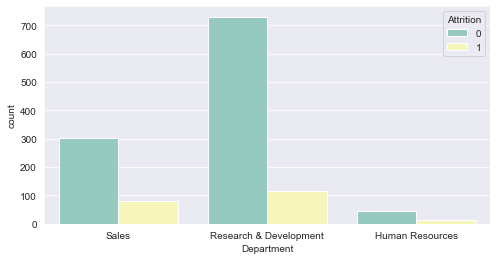

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Department',hue='Attrition',palette="Set3",data=df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

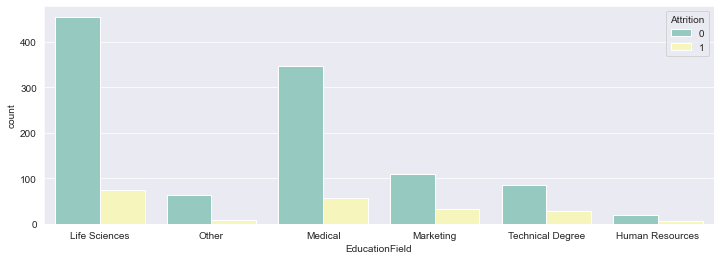

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='EducationField',hue='Attrition',palette="Set3",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

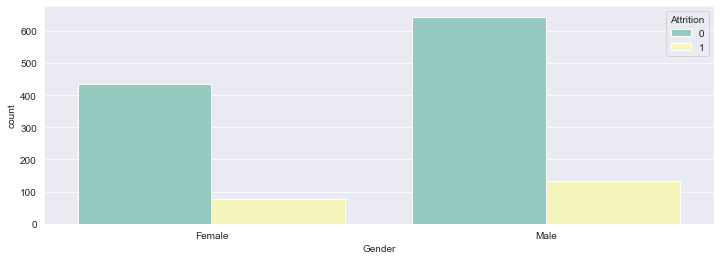

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Gender',hue='Attrition',palette="Set3",data=df)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

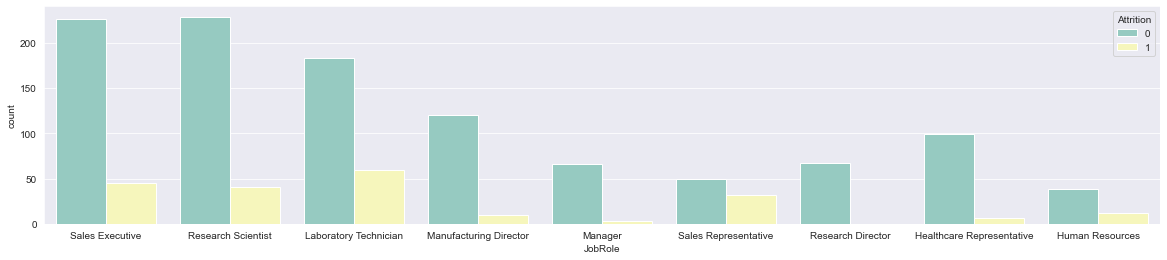

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x='JobRole',hue='Attrition',palette="Set3",data=df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

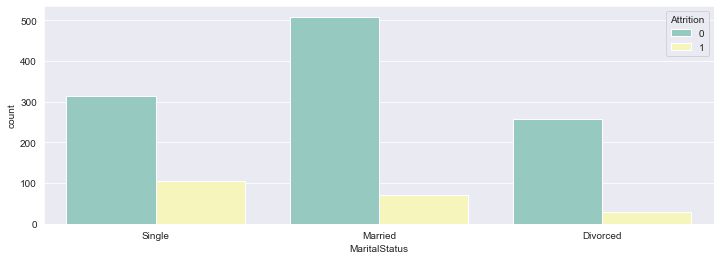

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='MaritalStatus',hue='Attrition',palette="Set3",data=df)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

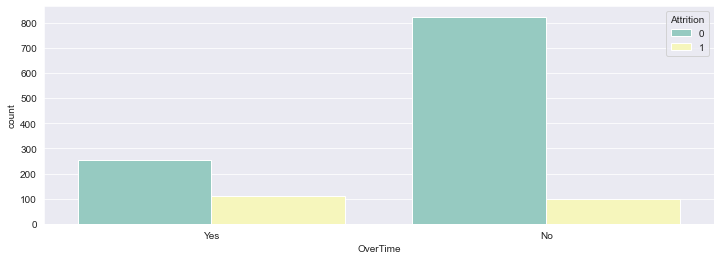

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='OverTime',hue='Attrition',palette="Set3",data=df)

### Preparing data for training

初學Python手記#3-資料前處理( Label encoding、 One hot encoding)
原始資料是有序離散值的話 => Label Encoding
原始資料是無序離散值的話 => One Hot Encoding (Dummies)
https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [ ]:
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel'])
df['Department'] = LabelEncoder().fit_transform(df['Department'])
df['EducationField'] = LabelEncoder().fit_transform(df['EducationField'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['JobRole'] = LabelEncoder().fit_transform(df['JobRole'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[numeric_cols].head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df[numeric_cols] 

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
df[numeric_cols]  = MinMaxScaler().fit_transform(df[numeric_cols])

In [ ]:
df[numeric_cols].head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.716332,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262814,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.210526,0.0,0.000000,0.162162,0.235294,0.000000,0.294118
1,0.738095,0.0,0.126791,0.250000,0.00,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217306,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.263158,0.5,0.666667,0.270270,0.411765,0.166667,0.411765
2,0.452381,1.0,0.910458,0.035714,0.25,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.057003,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.184211,0.5,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.924069,0.071429,0.75,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100190,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.210526,0.5,0.666667,0.216216,0.411765,0.500000,0.000000
4,0.214286,0.0,0.350287,0.035714,0.00,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129667,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.157895,0.5,0.666667,0.054054,0.117647,0.333333,0.117647


Automatic Feature Selection in Python
https://hackernoon.com/automatic-feature-selection-in-python-an-essential-guide-uv3e37mk

資料前處理-資料不平衡處理方法
做SMOTE處理
https://ithelp.ithome.com.tw/articles/10261413?sc=rss.iron

In [ ]:
cols = list(df.columns)
cols.remove('Attrition')
sampled,target= SMOTE().fit_resample(df[cols],df['Attrition'])

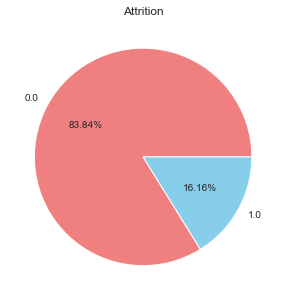

In [ ]:
plt.figure(figsize=(10,5))
df['Attrition'].value_counts().plot(kind='pie',colors=['lightcoral','skyblue'],autopct='%1.2f%%')
plt.title('Attrition')
plt.ylabel('')
plt.show()

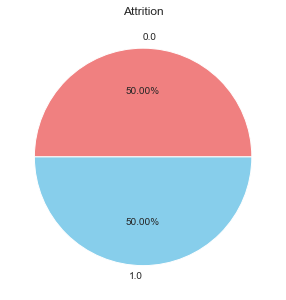

In [ ]:
plt.figure(figsize=(10,5))
target.value_counts().plot(kind='pie',colors=['lightcoral','skyblue'],autopct='%1.2f%%')
plt.title('Attrition')
plt.ylabel('')
plt.show()
                                                          

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],target,
                                                test_size=0.3,
                                                shuffle=True)

Train Accuracy : 0.77 %
Test Accuracy : 0.77 %


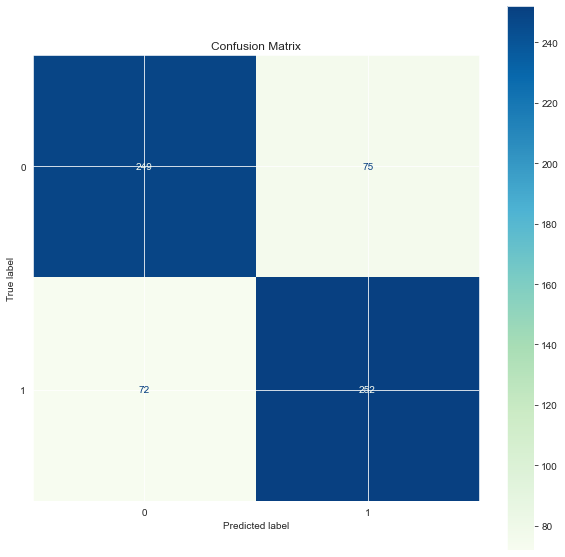

In [ ]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

How to choose n_estimators in RandomForestClassifier?
https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier

Train Accuracy : 1.00 %
Test Accuracy : 0.92 %


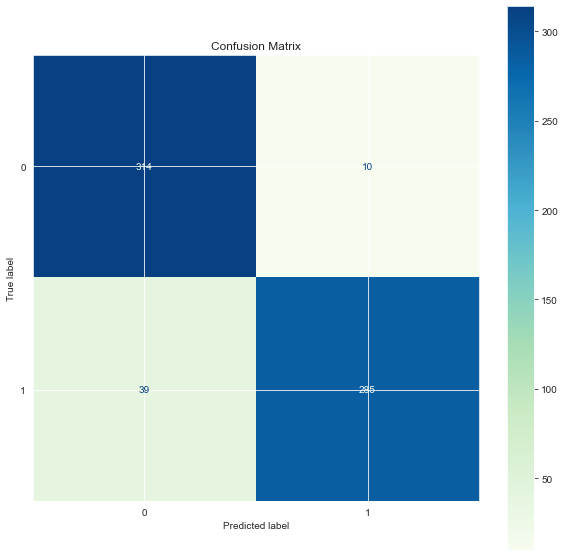

In [ ]:
random_forest = RandomForestClassifier(n_estimators=666,
                                      random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()

[16:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy : 1.00 %
Test Accuracy : 0.92 %


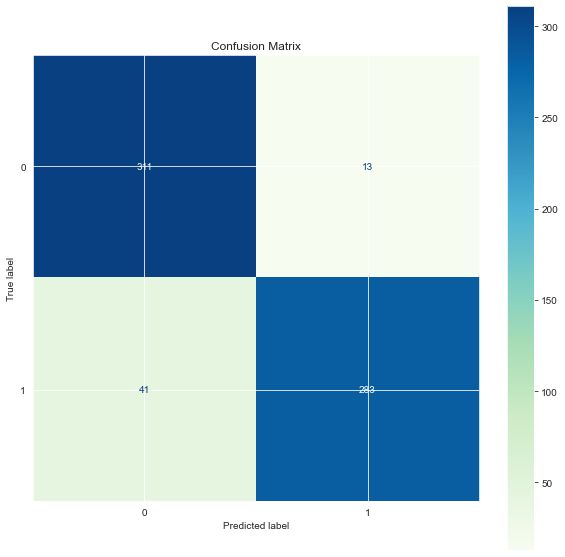

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=500,use_label_encoder=False,
                                      random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp.plot(ax=ax,cmap='GnBu')
plt.show()